In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Set additional parameters for charts and tables

# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

# 1 Data Preprocessing: chile_data1
## First 5 dimensions: 
#### 01 CULTURAL HERITAGE AND EVENTS
#### 02 NATURAL RESOURCES AND SUSTAINABILITY
#### 03 HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT
#### 04 TOURISM INFRASTRUCTURE
#### 05 TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

In [69]:
# Read data in csv format, using encoding, and read the 3rd row as column names

chile_data1 = pd.read_csv('Tourism Chile D1 - D5_updated1019.csv', encoding = 'ISO-8859-1', header = 3)
chile_data1

,Unnamed: 0,NÂ°,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
0,NaN,XV,Arica y Parinacota,31.0,2,0,30,28,4,22.1,2,105,12,2,25.4,1,0,0,0,4,32,4,3,9,32,7,59,-,21.9,0.4600,58.000000,1,0.000000,5,-,13,13,4,6,6,2,0,8,2,0,0,2,-,0,1,42.556000,0.880000,"$ 293,648",94.1,83.8,11.100000,53.00000,2,193,11,20.038000,356,23.69000,18.740000,"6,544",33.010000,37.0,2.3,5,3,0.0,0,"97,454","34,186","1,151,575",5.273000,2.129000,17.35,"45,248","15,045",13,"167,211",4.67,3
1,NaN,I,TarapacÃ¡,0.0,5,1,13,73,5,20.8,2,178,12,1,12.6,1,0,0,0,0,34,10,1,6,34,12,0,0.2,9.1,0.0300,76.030000,1,0.000000,16,-,2,6,1,1,7,5,0,5,6,4,2,3,5,0,0,68.563000,1.450000,"$ 381,466",91.7,66.7,10.700000,42.00000,5,255,19,22.180000,380,23.03000,22.170000,"11,108",41.430000,42.8,2.1,5,10,0.0,11,"235,365","40,919","19,560",4.185000,4.021000,15.90,"81,182","17,161",0,"434,727",184.10,1
2,NaN,II,Antofagasta,1.0,9,0,28,81,16,27.4,8,203,15,2,5.7,2,1,0,3,1,24,37,0,4,31,26,63,-,2.8,0.0300,39.560000,2,0.000000,22,-,5,28,8,13,3,14,1,6,10,6,4,0,5,0,0,54.486000,1.080000,"$ 475,866",91.7,66.7,10.600000,40.00000,7,529,47,20.446000,184,24.55000,22.760000,"19,920",35.020000,44.6,1.8,2,10,17.0,15,"413,922","84,195","22,898",2.024400,3.332000,52.25,"112,607","315,888",0,"115,100",2

In [70]:
# Remove first 2 columns
chile_data1.drop(chile_data1.iloc[:, 0:2], inplace = True, axis = 1)

In [71]:
# Remove last row with the aggregated total data
chile_data1 = chile_data1[:-1]

In [72]:
# Rename the first column from "VARIABLE" to "Regions"
chile_data1 = chile_data1.rename(columns={'VARIABLE': 'Regions'})

In [73]:
chile_data1

,Regions,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
0,Arica y Parinacota,31.0,2,0,30,28,4,22.1,2,105,12,2,25.4,1,0,0,0,4,32,4,3,9,32,7,59,-,21.9,0.46,58.00,1,0.00,5,-,13,13,4,6,6,2,0,8,2,0,0,2,-,0,1,42.556,0.88,"$ 293,648",94.1,83.8,11.1,53.0,2,193,11,20.038,356,23.69,18.74,"6,544",33.01,37.0,2.3,5,3,0.0,0,"97,454","34,186","1,151,575",5.2730,2.129,17.35,"45,248","15,045",13,"167,211",4.67,3
1,TarapacÃ¡,0.0,5,1,13,73,5,20.8,2,178,12,1,12.6,1,0,0,0,0,34,10,1,6,34,12,0,0.2,9.1,0.03,76.03,1,0.00,16,-,2,6,1,1,7,5,0,5,6,4,2,3,5,0,0,68.563,1.45,"$ 381,466",91.7,66.7,10.7,42.0,5,255,19,22.180,380,23.03,22.17,"11,108",41.43,42.8,2.1,5,10,0.0,11,"235,365","40,919","19,560",4.1850,4.021,15.90,"81,182","17,161",0,"434,727",184.10,1
2,Antofagasta,1.0,9,0,28,81,16,27.4,8,203,15,2,5.7,2,1,0,3,1,24,37,0,4,31,26,63,-,2.8,0.03,39.56,2,0.00,22,-,5,28,8,13,3,14,1,6,10,6,4,0,5,0,0,54.486,1.08,"$ 475,866",91.7,66.7,10.6,40.0,7,529,47,20.446,184,24.55,22.76,"19,920",35.02,44.6,1.8,2,10,17.0,15,"413,922","84,195","22,898",2.0244,3.332,52.25,"112,607","315,888",0,"115,100",23.00,5
3,Atacama,8.0,10,0,8,35,7,20.0,0,144,12,0,7.5,0,0,0,0,0,18,5,0,2,29,7,33,-,2.0,0.02,40.76,0,3.93,17,NaN,7,23,2,7,2,10,0,3,13,1,3,2,5,1,0,51.844,0.94,"$ 379,971",89.

In [74]:
# Check datatype of columns: integers or floats, or objects.
chile_data1.dtypes

Regions                                                                       object
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                float64
NUMBER OF CULTURAL CENTERS                                                     int64
WORLD CULTURAL HERITAGE SITES                                                  int64
NUMBER OF ARCHEOLOGICAL SITES                                                  int64
NATIONAL MONUMENTS                                                             int64
MUSEUMS                                                                        int64
% OF POPULATION THAT ATTENDS MUSEUMS                                         float64
THEATERS                                                                       int64
NUMBER OF THEATER PLAYS PER YEAR                                               int64
LIBRARIES                                                                      int64
GALERIES                                                         

In [75]:
# Define the function to clean columns that are object type

def clean_object(df):
    df = df.replace(r'[<$]', '', regex = True)       # Remove $ symbol
    df = df.replace(',','', regex = True)            # Remove commas from numbers
    df = df.replace('-','', regex = True)            # Remove `-` character
    df = df.replace(r'^\s*$', np.nan, regex = True)  # Replace empty values with NaNs
    return df    

In [76]:
# Apply above defined function to the dataframe

chile_data1 = clean_object(chile_data1)

# Check new dataframe
# chile_data1

In [77]:
# Define the function to transform object columns to numeric columns

def object_to_numeric(df):
    all_columns = df.columns                                                      # Select all columns
    numerical_columns = df._get_numeric_data().columns                            # Pick out numeric columns
    object_columns = [col for col in all_columns if col not in numerical_columns] # Pick out object columns
    object_columns = object_columns[1:]                                           # Take out 'Regions' from object_columns
    df[object_columns] = df[object_columns].apply(pd.to_numeric, errors = 'coerce', axis = 1)
                                                                                  # Convert
    print(df.dtypes)                                                              # Check datatypes after transformation
    return df

In [78]:
# Apply above defined function to the dataframe

chile_data1 = object_to_numeric(chile_data1)

Regions                                                                       object
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                float64
NUMBER OF CULTURAL CENTERS                                                     int64
WORLD CULTURAL HERITAGE SITES                                                  int64
NUMBER OF ARCHEOLOGICAL SITES                                                  int64
NATIONAL MONUMENTS                                                             int64
MUSEUMS                                                                        int64
% OF POPULATION THAT ATTENDS MUSEUMS                                         float64
THEATERS                                                                       int64
NUMBER OF THEATER PLAYS PER YEAR                                               int64
LIBRARIES                                                                      int64
GALERIES                                                         

In [79]:
# Check NaNs in the dataset

chile_data1.isnull().sum(axis = 0)

Regions                                                                      0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                0
NUMBER OF CULTURAL CENTERS                                                   0
WORLD CULTURAL HERITAGE SITES                                                0
NUMBER OF ARCHEOLOGICAL SITES                                                0
NATIONAL MONUMENTS                                                           0
MUSEUMS                                                                      0
% OF POPULATION THAT ATTENDS MUSEUMS                                         0
THEATERS                                                                     0
NUMBER OF THEATER PLAYS PER YEAR                                             0
LIBRARIES                                                                    0
GALERIES                                                                     0
% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP   

###### Now after replacement and transformation, we now have NaNs in 4 columns:
- % OF LAND THAT CORRESPONDS TO FORESTS (3 NaNs)
- LAND AFFECTED BY WILDFIRES (4 NaNs)
- PRESERVED SITES (2 NaNs) 
- NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY (1 NaN)

Ideally, we need to request this data from the client. Since it is a small dataset, these numbers are important.

After taking a look at the data, I found out that the regions that have NaNs in '% OF LAND THAT CORRESPONDS TO FORESTS' are very similar to those have NaNs in 'LAND AFFECTED BY WILDFIRES'. Thus, I make the assumption that these regions have neglectable amount of land corresponding to forests, so they also don't have land affected by wildfires. I would replace the NaNs in these two columns with 0.     

For the other two columns, I will impute these variables and replace NaNs with mean value of the column.


In [80]:
# Impute data for NaNs - strategy 1: replace with 0 (assumption explained above)

chile_data1['% OF LAND THAT CORRESPONDS TO FORESTS'] = chile_data1['% OF LAND THAT CORRESPONDS TO FORESTS'].fillna(0)
chile_data1['LAND AFFECTED BY WILDFIRES'] = chile_data1['LAND AFFECTED BY WILDFIRES'].fillna(0)

In [81]:
# Impute data for NaNs - strategy 2: replace with mean (assumption explained above)

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

chile_data1[['PRESERVED SITES', 
             'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']] = imputer.fit_transform(
    chile_data1[['PRESERVED SITES',
                 'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']])

In [82]:
# Check NaNs in the dataset again to make sure

chile_data1.isnull().sum(axis = 0)
# Now we don't have any NaNs

Regions                                                                      0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                0
NUMBER OF CULTURAL CENTERS                                                   0
WORLD CULTURAL HERITAGE SITES                                                0
NUMBER OF ARCHEOLOGICAL SITES                                                0
NATIONAL MONUMENTS                                                           0
MUSEUMS                                                                      0
% OF POPULATION THAT ATTENDS MUSEUMS                                         0
THEATERS                                                                     0
NUMBER OF THEATER PLAYS PER YEAR                                             0
LIBRARIES                                                                    0
GALERIES                                                                     0
% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP   

# 2 Data Preprocessing: chile_data2
## Last 5 dimensions: 
#### 06 TOURISM-RELATED SERVICES
#### 07 SECURITY AND SAFETY 
#### 08 ECONOMIC PERFORMANCE
#### 09 TOURISM PROMOTION
#### 10 GOVERNMENTAL INVOLVEMENT AND EFFICIENCY

In [83]:
# Read data in csv format, using encoding, and read the 7th row as column names

chile_data2 = pd.read_csv('Tourism Chile D6 - D10 (3_updated1019).csv', encoding = 'ISO-8859-1', header = 7)
chile_data2

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,-,-,240.55,17,6,-,0.318,0.260,42.184,15.819,0.513,"11,884,613",0.426,"26,467","2,387",981,319,265,7.3,8.2,84.369,1,11,253,94.915,"45,560",137,5.273,"6,517","1,060,490","193,364","118,413","92,641","36,370,835","11,757,543","446,922","24,729,573",1,NaN
1,TarapacÃ¡ (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,-,2,213.07,28,0,-,0.421,0.468,87.884,0.000,0.516,"14,740,693",0.398,"76,896","1,862","1,105",593,592,4.8,13.4,485.457,6,14.9,"59,745",138.104,"83,265","3,236",4.185,"7,600","1,750,481","74,404","13,600",-,"42,364,100","12,796,789","355,208","29,714,382",2,NaN
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,-,3,259.23,39,2,-,0.546,0.314,109.315,0.000,0.381,"22,383,612",0.495,"123,017","4,228","2,324",7,765,6.2,7.3,12.146,13,9.6,"30,220",178.143,"238,010","16,666",4.049,"16,280","2,846,340","200,000","149,000","149,744","38,262,875","29,066,423","192,572","50,841,622",1,NaN
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,-,-,184.01,35,1,-,0.390,0.197,66.841,0.000,0.488,"17,068,077",0.533,"21,705","3,125",965,14,504,6.4,10.2,15.727,3,29.3,"17,860",145.477,"53,046","3,456",3.932,"11,614","556,668","94,100","187,035",-,"35,948,639","16,986,593","233,225","30,224,699",2,NaN
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,-,1,150.06,72,3,-,0.288,0.218,155.833,0.000,0.396,"20,225,710",0.449,"69,974","4,203","1,831",100,"1,082",6.0,12.3,11.605,3,29.0,"1,431",112.730,"275,447","2,229",1.658,"11,056","5,364,222","189,900","72,917",-,"64,917,630","33,222,779","673,800","44,790,979",3,NaN
5,ValparaÃ­so (V),52.408,47.050,16,27.756,55.850,9,1.948,12,44,12.209,3,18.710,2,8,230.65,179,3,5,0.311,0.291,87.671,1.948,0.432,"24,137,492",0.445,"236,177","19,176","6,765",166,"2,761",7.5,11.6,50.654,10,10.7,"16,641",143.520,"1,557,887","4,287",1.299,"5,649","3,058,423","129,481","63,996","1,079,295","101,802,434","24,239,428","811,772","51,647,041",1,NaN
6,Metrop

In [84]:
# Remove last 4 rows
chile_data2 = chile_data2[:-4]

# Remove last 1 column
chile_data2 = chile_data2.drop(columns = ['Unnamed: 51'])

# Check the dataframe again
chile_data2

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,-,-,240.55,17,6,-,0.318,0.260,42.184,15.819,0.513,"11,884,613",0.426,"26,467","2,387",981,319,265,7.3,8.2,84.369,1,11,253,94.915,"45,560",137,5.273,"6,517","1,060,490","193,364","118,413","92,641","36,370,835","11,757,543","446,922","24,729,573",1
1,TarapacÃ¡ (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,-,2,213.07,28,0,-,0.421,0.468,87.884,0.000,0.516,"14,740,693",0.398,"76,896","1,862","1,105",593,592,4.8,13.4,485.457,6,14.9,"59,745",138.104,"83,265","3,236",4.185,"7,600","1,750,481","74,404","13,600",-,"42,364,100","12,796,789","355,208","29,714,382",2
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,-,3,259.23,39,2,-,0.546,0.314,109.315,0.000,0.381,"22,383,612",0.495,"123,017","4,228","2,324",7,765,6.2,7.3,12.146,13,9.6,"30,220",178.143,"238,010","16,666",4.049,"16,280","2,846,340","200,000","149,000","149,744","38,262,875","29,066,423","192,572","50,841,622",1
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,-,-,184.01,35,1,-,0.390,0.197,66.841,0.000,0.488,"17,068,077",0.533,"21,705","3,125",965,14,504,6.4,10.2,15.727,3,29.3,"17,860",145.477,"53,046","3,456",3.932,"11,614","556,668","94,100","187,035",-,"35,948,639","16,986,593","233,225","30,224,699",2
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,-,1,150.06,72,3,-,0.288,0.218,155.833,0.000,0.396,"20,225,710",0.449,"69,974","4,203","1,831",100,"1,082",6.0,12.3,11.605,3,29.0,"1,431",112.730,"275,447","2,229",1.658,"11,056","5,364,222","189,900","72,917",-,"64,917,630","33,222,779","673,800","44,790,979",3
5,ValparaÃ­so (V),52.408,47.050,16,27.756,55.850,9,1.948,12,44,12.209,3,18.710,2,8,230.65,179,3,5,0.311,0.291,87.671,1.948,0.432,"24,137,492",0.445,"236,177","19,176","6,765",166,"2,761",7.5,11.6,50.654,10,10.7,"16,641",143.520,"1,557,887","4,287",1.299,"5,649","3,058,423","129,481","63,996","1,079,295","101,802,434","24,239,428","811,772","51,647,041",1
6,Metropolitana (RM),9.223,16.914,47,25.508,

In [85]:
# Apply the function to clean columns that are object type
chile_data2 = clean_object(chile_data2)

# Check new dataframe
# chile_data2

In [86]:
# Apply the function to transform object columns to numeric columns

chile_data2 = object_to_numeric(chile_data2)

Regions                                                                            object
Density of restaurants per 100,000 habitants                                      float64
People working at restaurants per 10,000 habitants                                float64
Car rental agencies                                                               float64
Hospital beds per 10,000 habitants                                                float64
Density of ATM machines per 100,000 habitants                                     float64
Spas                                                                              float64
Casinos per 100,000 habitants                                                     float64
Golf courses                                                                      float64
Artwork Centers                                                                   float64
Density of tourist guides per 100,000 habitants                                   float64
Thermal ce

In [87]:
# Check NaNs in the dataset

chile_data2.isnull().sum(axis = 0)

Regions                                                                            0
Density of restaurants per 100,000 habitants                                       0
People working at restaurants per 10,000 habitants                                 0
Car rental agencies                                                                0
Hospital beds per 10,000 habitants                                                 0
Density of ATM machines per 100,000 habitants                                      0
Spas                                                                               0
Casinos per 100,000 habitants                                                      0
Golf courses                                                                       0
Artwork Centers                                                                    0
Density of tourist guides per 100,000 habitants                                    0
Thermal centers                                                  

###### Now after replacement and transformation, we now have NaNs in 8 columns:
- Ski resorts (6 NaNs)
- Major shopping centers (4 NaNs)
- Number of vineyards (11 NaNs) 
- Crime index (1 NaN)
- Illegal commerce (2 NaNs)
- Yearly budget for international tourism promotion (1 NaN)
- Governmental resources allocated to tourism promotion (5 NaNs)
- Seed funds allocated to the tourism sector (1 NaN)

Again, two strategies will be applied to clean these missing values.    

Firstly, I will replace NaNs in 'Ski resorts', 'Major shopping centers', and 'Number of vineyards' with 0. Since these columns represent higher-end amenities, and there are no 0s in these columns, I assume that the NaNs here mean the regions do not have these amenities.

Secondly, I will replace the rest with the mean value of their respective columns, because I think these columns represent indexes that should be applicable to all regions. I assume NaNs here are due to error during data collection, so the mean value replacement approach is more appropriate. 

In [88]:
# Impute data for NaNs - strategy 1: replace with 0 (assumption explained above)

chile_data2['Ski resorts'] = chile_data2['Ski resorts'].fillna(0)
chile_data2['Major shopping centers'] = chile_data2['Major shopping centers'].fillna(0)
chile_data2['Number of vineyards'] = chile_data2['Number of vineyards'].fillna(0)

In [89]:
# Impute data for NaNs - strategy 2: replace with mean (assumption explained above)

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

chile_data2[['Seed funds allocated to the tourism sector ($)',
           'Governmental resources allocated to tourism promotion ($M)',
           'Yearly budget for international tourism promotion ($M)',
           'Illegal commerce',
           'Crime index']] = imputer.fit_transform(
    chile_data2[['Seed funds allocated to the tourism sector ($)',
                'Governmental resources allocated to tourism promotion ($M)',
                'Yearly budget for international tourism promotion ($M)',
                'Illegal commerce',
                'Crime index']])

In [90]:
# Check NaNs in the dataset to make sure

chile_data2.isnull().sum(axis = 0)

Regions                                                                           0
Density of restaurants per 100,000 habitants                                      0
People working at restaurants per 10,000 habitants                                0
Car rental agencies                                                               0
Hospital beds per 10,000 habitants                                                0
Density of ATM machines per 100,000 habitants                                     0
Spas                                                                              0
Casinos per 100,000 habitants                                                     0
Golf courses                                                                      0
Artwork Centers                                                                   0
Density of tourist guides per 100,000 habitants                                   0
Thermal centers                                                             

# 3 Data Preprocessing: combine chile_data1 and chile_data2

In [97]:
# Since the orders of regions are the same in both dataframe, I just put the two dataframe together, without using merge

chile_data = pd.concat([chile_data1, chile_data2.drop(columns = 'Regions')], axis = 1)

In [98]:
chile_data.shape

(15, 132)

# 4 Principal Component Analysis (PCA)

In [99]:
# Standardize data for applying PCA

# Create a copy
df = chile_data.copy()

# Standardize
scaler = StandardScaler()

df.loc[:, df.columns != 'Regions'] = scaler.fit_transform(df.loc[:, df.columns != 'Regions'])

# Set region as an index column
df = df.set_index('Regions')

#### Eigenvalues and eigenvectors

In [100]:
# Calculate eigenvalues and vectors
cov_mat = np.cov(df.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)

# Print 
# print('Eigenvectors \n%s' %eig_vec)
# print('\nEigenvalues \n%s' %eig_val)

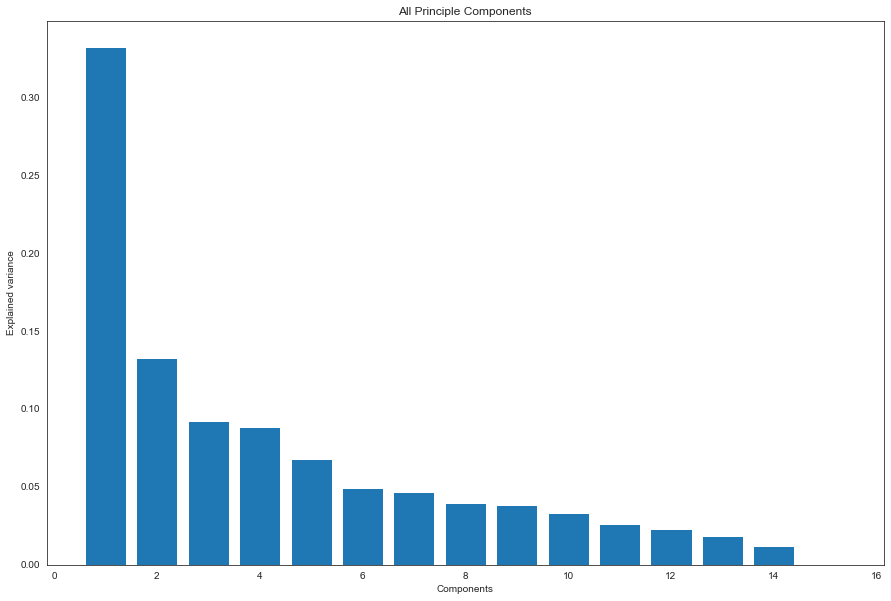

In [101]:
# Run PCA and fit the model

myPCA = PCA()
x     = myPCA.fit(df)

# Plotting the varaince explained by each component
plt.bar(range(1,len(x.explained_variance_ )+1),x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

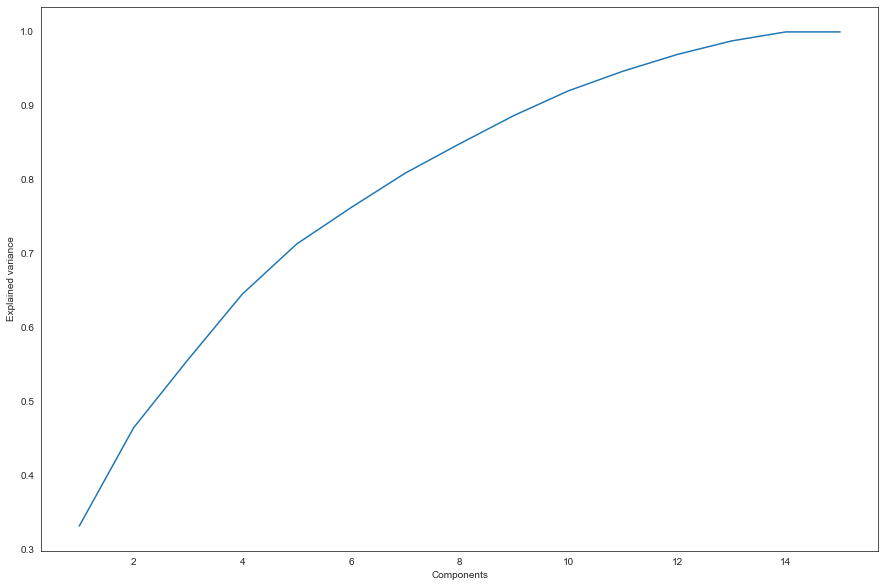

In [102]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass

In [103]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()

array([0.3321481 , 0.4649771 , 0.55703332, 0.64563531, 0.71332672,
       0.76256198, 0.80921085, 0.84886898, 0.88708633, 0.92034831,
       0.94679184, 0.96944709, 0.9877715 , 1.        , 1.        ])

##### According to the above result, we have 15 principal components here.    
The numbers in the above result indicates that, the total sum of the explained variance increases with each component, but at the same time the majority of variance explained by several first components.   
For instance, you can see that the principle component 1 explains about 33% of variance, while principle components 6 and 7 explain about 5% and 4% respectively.    

I want to select the components that capture most of the variance.    
##### Thus, I will use only first 6 components, which explain 76.3% of variance.

In [115]:
pca = PCA(n_components = 6)
pca_model = pca.fit(df)

# Calculate loadings

### print("The loadings are are \n {}".format(pca_model.components_))

# See the importance of each feature for principle components for each component separately
# These are results for the Principal Component 1 (sorted)

### pd.DataFrame(np.column_stack((df.columns, pca.components_[0]))).sort_values(by = 1, ascending = False)

In [119]:
# Calculate factor scores
pca_model = pca.fit_transform(df)

PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.484852,1.764464,-1.798993,0.024696,-3.293384,4.963699
1,-2.358607,1.929934,-5.155752,-0.639984,2.529265,4.532263
2,-0.861427,3.892164,-3.933696,0.021090,3.015185,-4.496842
3,-3.615715,1.076837,-5.142793,-1.089563,0.783786,-1.302723
4,-1.040964,-3.107735,-1.712781,2.985098,2.760371,-0.228396
5,4.835292,-1.893433,1.874994,10.991644,-0.205120,-0.509208
6,22.254643,4.440057,0.055366,-2.495396,-1.631285,0.907723
7,-1.245878,-4.403380,-1.678822,1.831481,-3.458413,0.772239
8,-1.216612,-5.416131,-1.031684,-1.725436,-2.242107,-0.352112
9,2.999536,-3.681077,-1.135120,-2.910789,1.849205,-3.578947


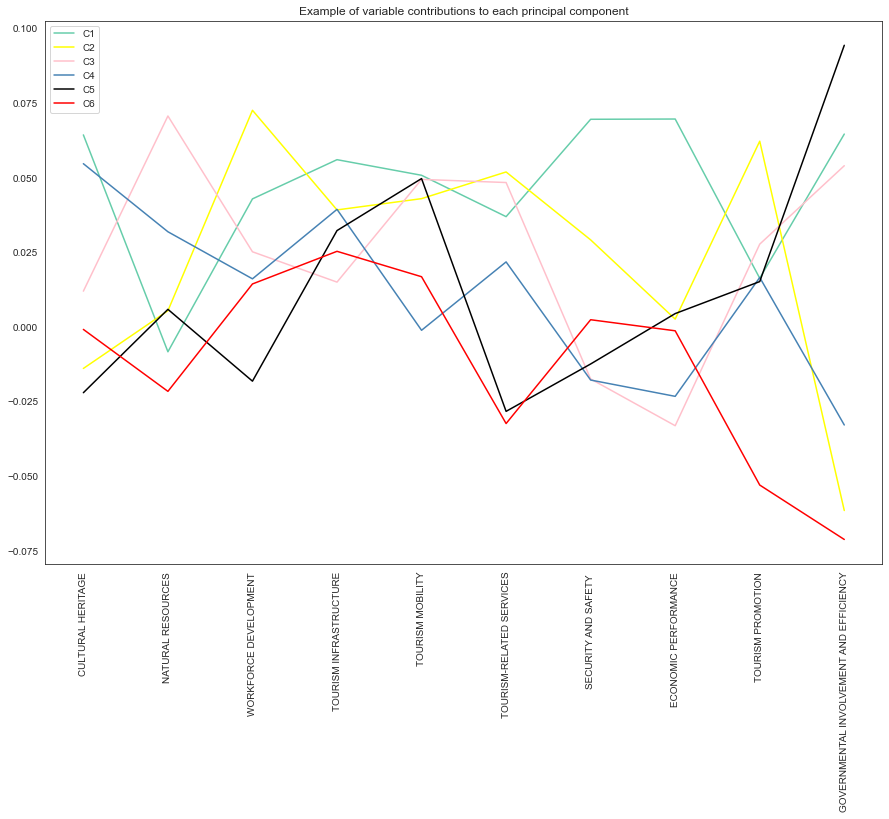

In [143]:
# Different variables in each component

# Fit the model
myPCA = PCA(n_components = 6)
pca_model = myPCA.fit(df)
y_axis = [0,0,0,0,0,0]
for i in range(0,6):
    y_axis[i]=[np.mean(pca_model.components_[i][0:24]),   # 01 CULTURAL HERITAGE
               np.mean(pca_model.components_[i][24:47]),  # 02 NATURAL RESOURCES
               np.mean(pca_model.components_[i][47:59]),  # 03 WORKFORCE DEVELOPMENT
               np.mean(pca_model.components_[i][59:69]),  # 04 TOURISM INFRASTRUCTURE
               np.mean(pca_model.components_[i][69:81]),  # 05 TOURISM MOBILITY
               np.mean(pca_model.components_[i][81:99]),  # 06 TOURISM-RELATED SERVICES
               np.mean(pca_model.components_[i][99:111]), # 07 SECURITY AND SAFETY
               np.mean(pca_model.components_[i][111:120]),# 08 ECONOMIC PERFORMANCE
               np.mean(pca_model.components_[i][120:126]),# 09 TOURISM PROMOTION
               np.mean(pca_model.components_[i][126:131])]# 10 GOVERNMENTAL INVOLVEMENT AND EFFICIENCY

# Plot
x_axis = ['CULTURAL HERITAGE', 
          'NATURAL RESOURCES', 
          'WORKFORCE DEVELOPMENT', 
          'TOURISM INFRASTRUCTURE', 
          'TOURISM MOBILITY', 
          'TOURISM-RELATED SERVICES', 
          'SECURITY AND SAFETY ', 
          'ECONOMIC PERFORMANCE', 
          'TOURISM PROMOTION', 
          'GOVERNMENTAL INVOLVEMENT AND EFFICIENCY']

plt.plot(x_axis,y_axis[0], color = 'mediumaquamarine', label = "C1")
plt.plot(x_axis,y_axis[1], color = 'yellow', label = "C2")
plt.plot(x_axis,y_axis[2], color = 'pink', label = "C3")
plt.plot(x_axis,y_axis[3], color = 'steelblue', label = "C4")
plt.plot(x_axis,y_axis[4], color = 'black', label = "C5")
plt.plot(x_axis,y_axis[5], color = 'red', label = "C6")
plt.xticks(rotation = 90)
plt.title('Variable contributions to each principal component')
plt.legend()
pass

# 5 Develop scoring system for 10 dimensions

#### 5.1 - Calculate a weighted average for each variable in principal components.
Multiply the percentage value of the explained variance by the percentage value of a feature in the selected principal component. As a result, a weighted average will be a new column in the dataframe with principal components.

In [149]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((df.columns, 
                                        pca_model.components_[0] * pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5])))
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights.head()

,1,2,3,4,5,6,weighted_average
0,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,-0.00349703,-0.0191299,-0.00471924,0.00557629,-0.0108352,0.00462587,-0.036691
NUMBER OF CULTURAL CENTERS,0.0461821,-0.0037429,0.00451749,0.00276272,0.00216259,-0.00201985,0.065388
WORLD CULTURAL HERITAGE SITES,0.00489752,-0.00556496,0.00332327,0.0188002,0.00523406,0.00590969,0.042750
NUMBER OF ARCHEOLOGICAL SITES,-0.00462714,0.00577805,-0.0110068,0.0127451,-0.00122614,0.00293163,0.006025
NATIONAL MONUMENTS,0.0485681,0.00495675,0.00113125,0.0013392,-0.00214279,0.000559138,0.071354


#### 5.2 - Calculate a score for each dimension.
Multiply weighted average of a variable by each standartized value in each column and sum up results, receiving a final score.

## Ranking for dimension 01 CULTURAL HERITAGE AND EVENTS

In [151]:
# Create a dataframe for relevant variables
dim1 = df.iloc[:, 0:24].mul(weights['weighted_average'][0:24], axis = 1)

# Create a score ranking
dim1['Ranking 1'] = dim1.sum(axis = 1)

# Sort by score
dim1.sort_values(by = 'Ranking 1', ascending = False).head()

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,Ranking 1
Regions,,,,,,,,,,,,,,,,,,,,,,,,,
Metropolitana,0.022604,0.178081,-0.023898,-0.004221,0.248680,0.177626,0.024468,0.215574,0.228102,0.167096,0.225741,0.004004,0.218395,0.027074,0.01006,0.022794,0.014717,-0.017975,-0.001167,0.006126,-0.003683,0.178952,0.196274,0.047414,2.162837
ValparaÃ­so,-0.008502,0.093351,0.119491,0.009263,0.059484,0.014645,0.056125,-0.010277,-0.012214,0.039436,0.035865,0.004462,-0.006097,-0.021659,-0.01509,0.037041,0.014717,0.017372,0.012842,0.006126,0.162059,0.196919,0.017985,0.186658,1.010002
BiobÃ­o,0.019493,0.071054,-0.023898,-0.004807,-0.019932,0.071334,-0.011146,0.007648,-0.005816,0.052023,0.035865,0.004106,0.052104,0.027074,0.01006,-0.019945,-0.002943,-0.011399,0.015177,-0.000942,-0.019468,-0.090554,0.060212,0.004017,0.219315
Los Lagos,0.031936,0.035378,0.047796,-0.004807,-0.016039,0.007559,-0.002242,-0.006692,-0.014140,-0.005514,-0.027426,-0.004482,-0.014412,0.027074,0.01006,-0.019945,0.032377,0.009152,-0.008172,0.002592,-0.019468,0.078336,0.003910,-0.008783,0.134046
Antofagasta,0.031936,-0.031513,-0.023898,0.011608,-0.002803,0.042989,0.072942,-0.006692,-0.016799,-0.034282,-0.016878,0.003191,-0.014412,0.010830,0.01006,0.022794,0.023547,-0.002356,0.031521,-0.008011,-0.003683,-0.015092,-0.005474,-0.018462,0.061062


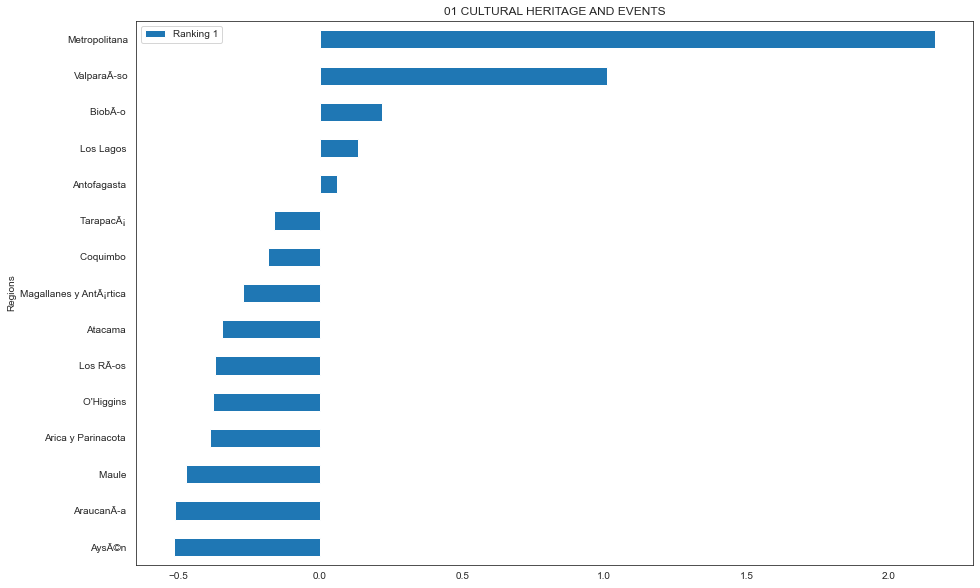

In [152]:
dim1.sort_values(by = 'Ranking 1',
                 ascending = True).plot.barh(y = 'Ranking 1',
                                             title = '01 CULTURAL HERITAGE AND EVENTS')
pass

## Ranking for dimension 02 NATURAL RESOURCES AND SUSTAINABILITY

In [155]:
# Create a dataframe for relevant variables
dim2 = df.iloc[:, 24:47].mul(weights['weighted_average'][24:47], axis = 1)

# Create a score ranking
dim2['Ranking 2'] = dim2.sum(axis = 1)

# Sort by score
dim2.sort_values(by = 'Ranking 2', ascending = False).head()

,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,Ranking 2
Regions,,,,,,,,,,,,,,,,,,,,,,,,
ValparaÃ­so,-0.003891,-0.003753,0.045796,-0.003377,0.124220,0.01448,0.021560,0.085375,0.005407,0.004051,0.025737,0.036527,0.009353,0.012488,-0.000529,0.081704,0.011421,-0.019645,0.035408,-0.029757,-0.014996,0.112576,0.051250,0.601401
Metropolitana,-0.003744,-0.004506,0.240547,0.010396,0.164148,0.01448,-0.009165,-0.011687,-0.007266,-0.003461,0.033357,0.018058,0.005661,-0.015411,-0.000048,0.005473,0.019207,-0.019645,0.035408,0.013942,-0.014996,-0.032164,-0.025625,0.412958
Los Lagos,0.014507,0.001768,-0.027331,-0.009308,-0.035492,0.01448,0.000208,-0.012275,0.004140,0.000736,-0.009821,-0.025035,-0.012799,0.004517,-0.000529,-0.012119,0.019207,0.116699,0.035408,0.013942,0.114972,0.112576,0.012813,0.321265
Coquimbo,-0.005997,-0.004715,-0.020890,-0.024287,-0.035492,0.01448,0.010103,0.009785,-0.005999,-0.002025,0.015578,0.036527,0.016737,0.026438,-0.001251,0.058248,0.019207,0.019939,0.015737,0.013942,-0.014996,0.064329,0.012813,0.218210
Magallanes y AntÃ¡rtica,0.001170,0.019081,-0.032635,0.000030,-0.008873,0.01448,-0.009165,-0.012128,0.013012,0.003056,-0.025060,-0.025035,0.020428,0.018467,0.003560,0.011337,0.019207,-0.019645,0.015737,0.010821,-0.014996,0.016082,0.012813,0.031743


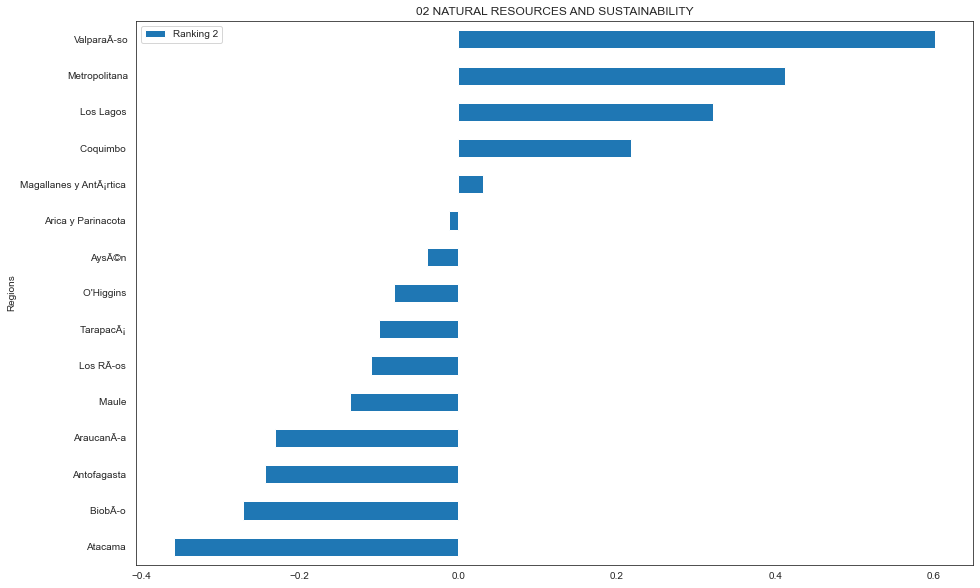

In [156]:
dim2.sort_values(by = 'Ranking 2',
                 ascending = True).plot.barh(y = 'Ranking 2',
                                             title = '02 NATURAL RESOURCES AND SUSTAINABILITY')
pass

## Ranking for dimension 03 HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT

In [157]:
# Create a dataframe for relevant variables
dim3 = df.iloc[:, 47:59].mul(weights['weighted_average'][47:59], axis = 1)

# Create a score ranking
dim3['Ranking 3'] = dim3.sum(axis = 1)

# Sort by score
dim3.sort_values(by = 'Ranking 3', ascending = False).head()

,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,Ranking 3
Regions,,,,,,,,,,,,,
Metropolitana,0.011563,0.063621,0.022020,0.000036,0.000092,0.076338,0.018410,0.202143,0.237468,0.243001,-0.003302,0.235662,1.107052
ValparaÃ­so,0.000380,-0.020233,-0.011800,0.000391,-0.000506,0.038588,0.010318,0.116328,0.047224,0.034620,-0.002071,0.025286,0.238526
Los Lagos,0.005204,0.210986,-0.017885,0.000391,0.000849,-0.055785,0.006272,0.011442,-0.018654,-0.019184,-0.000615,0.007288,0.130308
BiobÃ­o,-0.022688,-0.016264,-0.018212,0.000746,-0.000028,-0.005453,0.014364,0.078188,0.048801,0.035502,-0.003840,0.001137,0.112252
TarapacÃ¡,0.071381,-0.012625,0.009741,0.002522,0.000849,0.044880,-0.004855,-0.036233,-0.031455,-0.030871,-0.000406,-0.034423,-0.021496


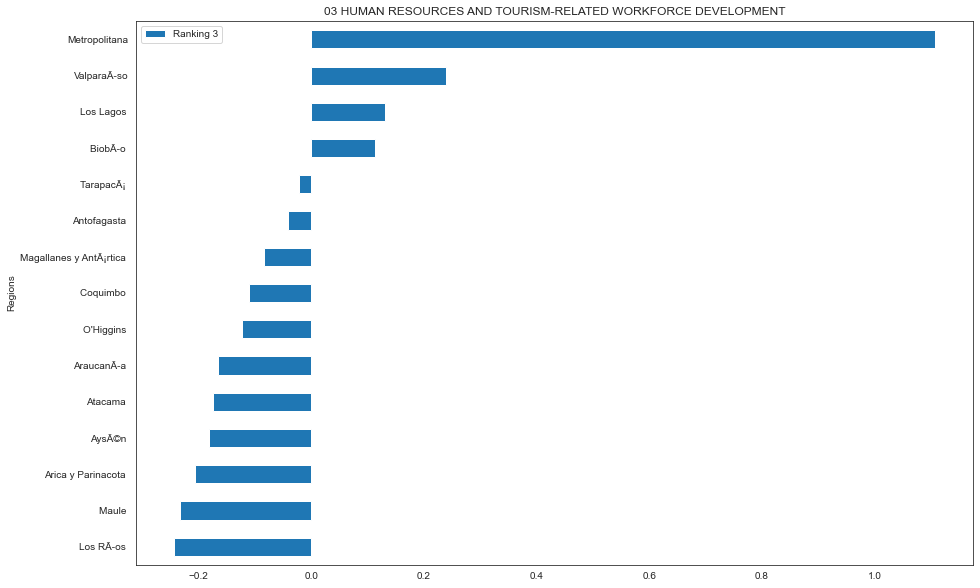

In [159]:
dim3.sort_values(by = 'Ranking 3',
                 ascending = True).plot.barh(y = 'Ranking 3',
                                             title = '03 HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT')
pass

## Ranking for dimension 04 TOURISM INFRASTRUCTURE

In [160]:
# Create a dataframe for relevant variables
dim4 = df.iloc[:, 59:69].mul(weights['weighted_average'][59:69], axis = 1)

# Create a score ranking
dim4['Ranking 4'] = dim4.sum(axis = 1)

# Sort by score
dim4.sort_values(by = 'Ranking 4', ascending = False).head()

,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),Ranking 4
Regions,,,,,,,,,,,
Metropolitana,0.132766,-0.007908,0.150957,-0.007816,0.107389,-0.001257,0.068811,0.255904,0.154317,0.024250,0.877413
ValparaÃ­so,-0.006070,-0.002575,0.156550,-0.001094,-0.024942,0.000539,0.059677,0.022329,0.196628,0.027814,0.428856
Los Lagos,-0.026843,0.003653,0.098968,0.000402,-0.016589,0.002335,0.178422,-0.008520,-0.024342,-0.007661,0.199826
Coquimbo,-0.017419,-0.001256,0.026945,-0.006297,-0.000762,-0.006645,-0.031665,-0.017335,0.059820,0.111495,0.116883
AraucanÃ­a,-0.045889,-0.004629,0.038480,-0.003979,0.008910,-0.003951,0.068811,-0.021742,-0.032023,-0.011565,-0.007576


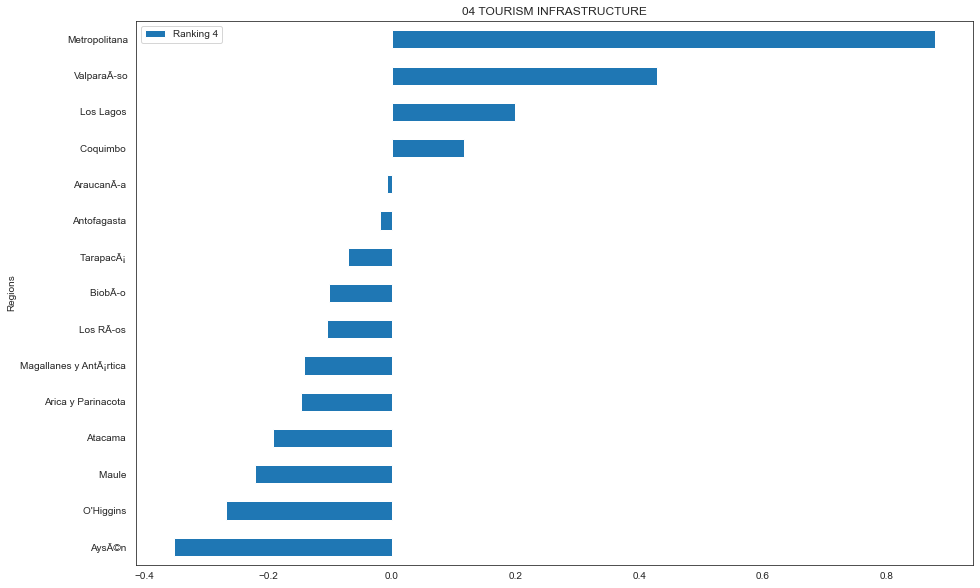

In [161]:
dim4.sort_values(by = 'Ranking 4',
                 ascending = True).plot.barh(y = 'Ranking 4',
                                             title = '04 TOURISM INFRASTRUCTURE')
pass

## Ranking for dimension 05 TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

In [162]:
# Create a dataframe for relevant variables
dim5 = df.iloc[:, 69:81].mul(weights['weighted_average'][69:81], axis = 1)

# Create a score ranking
dim5['Ranking 5'] = dim5.sum(axis = 1)

# Sort by score
dim5.sort_values(by = 'Ranking 5', ascending = False).head()

,NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,Ranking 5
Regions,,,,,,,,,,,,,
Metropolitana,0.091085,0.270813,0.127377,-0.005321,0.035771,0.099077,0.231574,-0.010282,-0.033870,0.259068,0.003948,0.002762,1.072002
Los Lagos,0.021159,0.004749,0.002827,0.140180,0.007550,-0.007560,-0.015696,0.099796,0.112783,-0.003210,0.033731,-0.001841,0.394468
ValparaÃ­so,0.083664,0.005501,0.011497,-0.014845,0.048740,0.030663,0.023559,0.006833,0.128496,0.063652,-0.007240,0.002762,0.383284
Arica y Parinacota,-0.050274,-0.023790,0.136431,0.054877,0.001818,-0.038599,-0.033488,-0.028957,0.034219,-0.010293,-0.013692,-0.001841,0.026411
BiobÃ­o,0.068799,-0.024908,-0.035789,-0.024638,0.028728,0.062178,0.022606,-0.019459,-0.033870,-0.056033,0.032436,0.002762,0.022813


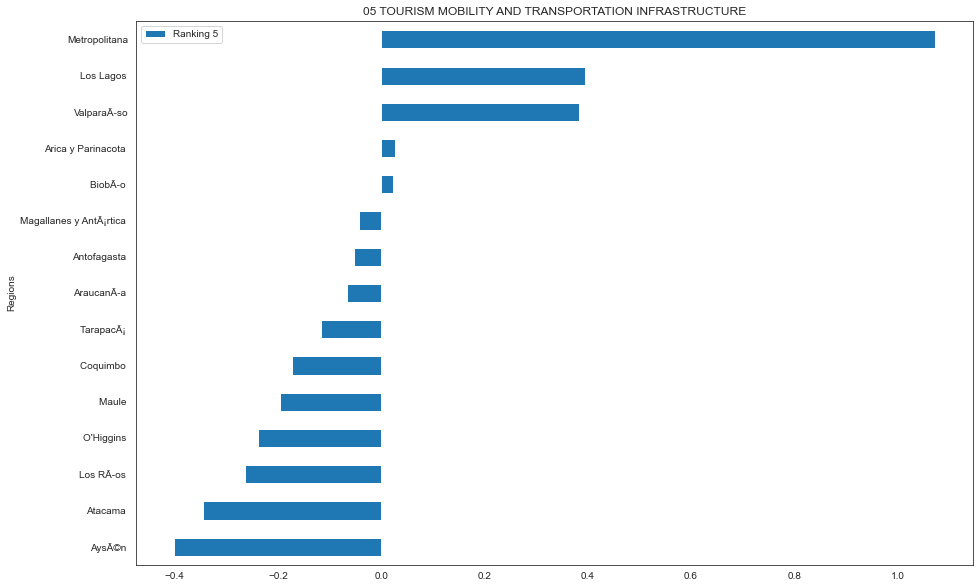

In [163]:
dim5.sort_values(by = 'Ranking 5',
                 ascending = True).plot.barh(y = 'Ranking 5',
                                             title = '05 TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE')
pass

## Ranking for dimension 06 TOURISM-RELATED SERVICES

In [165]:
# Create a dataframe for relevant variables
dim6 = df.iloc[:, 81:99].mul(weights['weighted_average'][81:99], axis = 1)

# Create a score ranking
dim6['Ranking 6'] = dim6.sum(axis = 1)

# Sort by score
dim6.sort_values(by = 'Ranking 6', ascending = False).head()

,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Ranking 6
Regions,,,,,,,,,,,,,,,,,,,
Metropolitana,-0.013683,-0.011128,0.174597,0.000161,0.064375,0.013533,0.005582,0.233964,0.032093,-0.003302,0.003207,0.000941,0.142849,0.256241,0.134303,0.185763,0.249066,0.000000,1.468560
ValparaÃ­so,0.009894,0.014416,-0.001515,0.001782,0.022078,-0.020300,0.002928,0.110101,0.036613,-0.002071,0.007215,0.000082,0.030073,0.035344,0.033479,0.033030,-0.013621,0.011108,0.310636
Magallanes y AntÃ¡rtica,0.013497,0.024834,-0.024239,0.006773,0.091145,0.013533,-0.012482,-0.041288,-0.028929,0.018807,0.019240,0.000156,-0.007518,-0.017672,0.099990,-0.040543,-0.013621,-0.002777,0.098906
Antofagasta,0.001617,0.004580,0.032571,0.003372,0.080743,0.002256,0.000066,-0.013763,0.018532,-0.000696,0.011223,0.001032,-0.045110,-0.008836,0.062021,-0.032161,-0.020918,-0.002777,0.093754
Los Lagos,0.001162,-0.002274,0.043933,-0.001904,-0.015410,0.006015,-0.000121,-0.027525,-0.001808,-0.000615,-0.012826,-0.001429,0.030073,-0.017672,-0.034500,-0.010275,0.008270,-0.002777,-0.039682


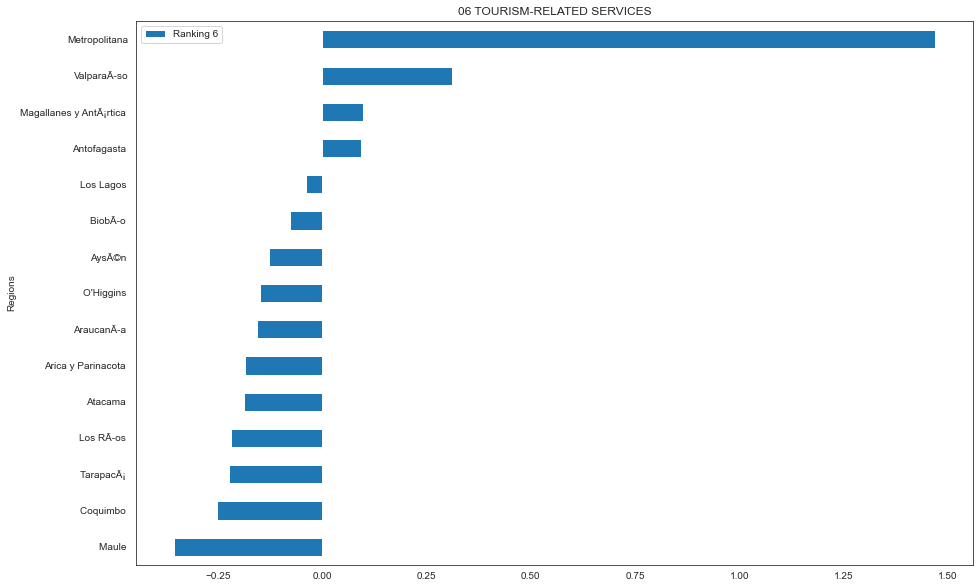

In [166]:
dim6.sort_values(by = 'Ranking 6',
                 ascending = True).plot.barh(y = 'Ranking 6',
                                             title = '06 TOURISM-RELATED SERVICES')
pass

## Ranking for dimension 07 SECURITY AND SAFETY

In [167]:
# Create a dataframe for relevant variables
dim7 = df.iloc[:, 99:111].mul(weights['weighted_average'][99:111], axis = 1)

# Create a score ranking
dim7['Ranking 7'] = dim7.sum(axis = 1)

# Sort by score
dim7.sort_values(by = 'Ranking 7', ascending = False).head()

,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Ranking 7
Regions,,,,,,,,,,,,,
Metropolitana,0.004609,0.003871,-0.008142,0.000154,0.013426,0.136211,0.035714,0.224131,0.229828,0.220147,0.232138,0.214621,1.306709
BiobÃ­o,0.002995,0.005896,-0.008736,0.000208,0.000604,0.064792,0.053529,0.028737,0.050038,0.021503,-0.025856,0.040980,0.234692
ValparaÃ­so,-0.003596,0.003331,0.001280,0.000049,0.003682,0.001268,0.008992,0.015904,0.049797,0.033425,-0.021458,0.028865,0.121539
TarapacÃ¡,0.011199,0.027231,0.001370,0.000208,0.025222,-0.033700,0.068799,-0.020530,-0.040970,-0.030716,-0.006902,-0.031959,-0.030747
AraucanÃ­a,0.005819,0.002926,-0.002713,0.000114,-0.012474,0.019364,-0.021547,-0.006081,-0.005201,-0.007417,-0.016106,-0.005094,-0.048411


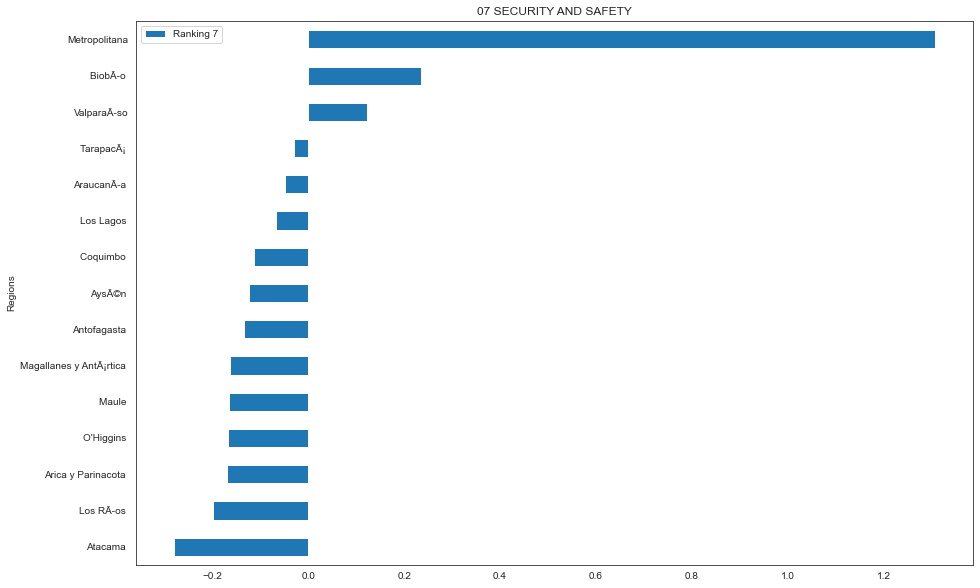

In [168]:
dim7.sort_values(by = 'Ranking 7',
                 ascending = True).plot.barh(y = 'Ranking 7',
                                             title = '07 SECURITY AND SAFETY')
pass

## Ranking for dimension 08 ECONOMIC PERFORMANCE

In [169]:
# Create a dataframe for relevant variables
dim8 = df.iloc[:, 111:120].mul(weights['weighted_average'][111:120], axis = 1)

# Create a score ranking
dim8['Ranking 8'] = dim8.sum(axis = 1)

# Sort by score
dim8.sort_values(by = 'Ranking 8', ascending = False).head()

,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Ranking 8
Regions,,,,,,,,,,
Metropolitana,-0.012601,0.022016,-0.001791,0.229046,0.010567,0.192215,0.221929,0.255024,0.012551,0.928958
Los Lagos,0.024152,-0.004906,-0.003142,-0.024324,0.026200,-0.030914,0.157788,-0.024340,-0.004169,0.116346
Antofagasta,0.000525,0.035477,-0.004127,0.003547,0.020383,0.012254,-0.016492,-0.019836,0.056926,0.088657
TarapacÃ¡,0.012776,-0.019264,0.036150,-0.014189,0.001115,0.057675,-0.025039,-0.025852,0.000006,0.023379
ValparaÃ­so,-0.010851,-0.003111,-0.000850,-0.004054,0.016384,-0.008637,-0.023882,0.031478,0.004460,0.000938


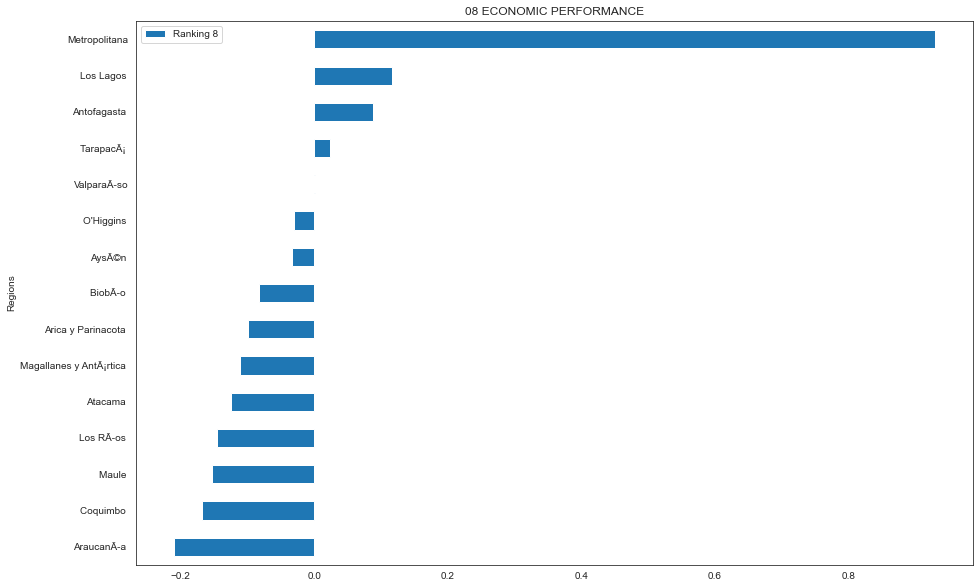

In [170]:
dim8.sort_values(by = 'Ranking 8',
                 ascending = True).plot.barh(y = 'Ranking 8',
                                             title = '08 ECONOMIC PERFORMANCE')
pass

## Ranking for dimension 09 TOURISM PROMOTION

In [171]:
# Create a dataframe for relevant variables
dim9 = df.iloc[:, 120:126].mul(weights['weighted_average'][120:126], axis = 1)

# Create a score ranking
dim9['Ranking 9'] = dim9.sum(axis = 1)

# Sort by score
dim9.sort_values(by = 'Ranking 9', ascending = False).head()

,Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Ranking 9
Regions,,,,,,,
Metropolitana,0.000148,0.062659,0.244132,0.024464,-1.273211e-18,0.000000,0.331403
ValparaÃ­so,0.000106,-0.016948,0.002110,0.008869,-5.661756e-03,0.086832,0.075307
Coquimbo,0.000091,0.014464,0.054502,-0.004127,-4.881219e-03,0.000000,0.060048
Los Lagos,-0.000018,-0.022415,0.094141,-0.020177,-2.781528e-03,-0.024206,0.024544
Antofagasta,-0.000012,0.044812,-0.002709,-0.006300,1.775618e-03,-0.014779,0.022788


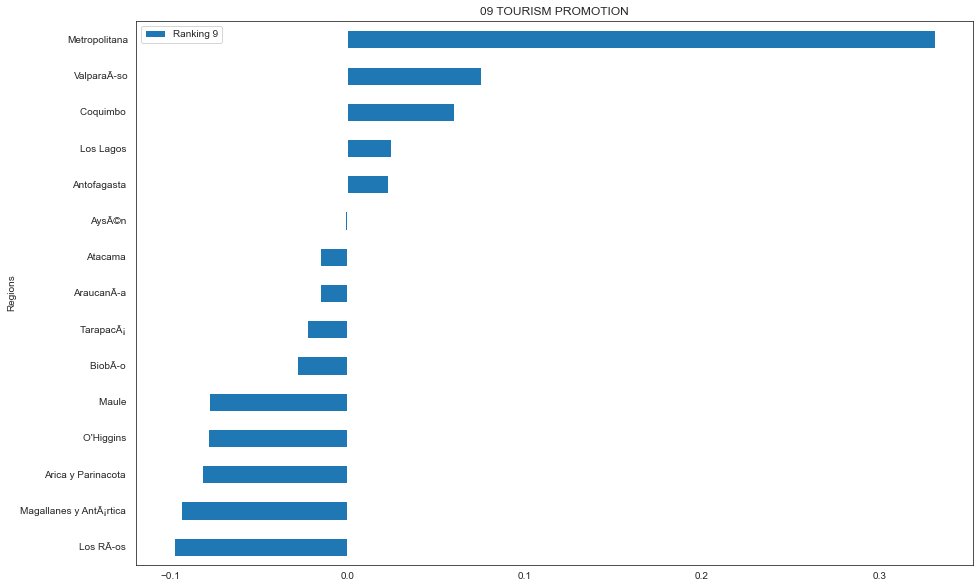

In [172]:
dim9.sort_values(by = 'Ranking 9',
                 ascending = True).plot.barh(y = 'Ranking 9',
                                             title = '09 TOURISM PROMOTION')
pass

## Ranking for dimension 10 GOVERNMENTAL INVOLVEMENT AND EFFICIENCY

In [174]:
# Create a dataframe for relevant variables
dim10 = df.iloc[:, 126:131].mul(weights['weighted_average'][126:131], axis = 1)

# Create a score ranking
dim10['Ranking 10'] = dim10.sum(axis = 1)

# Sort by score
dim10.sort_values(by = 'Ranking 10', ascending = False).head()

,Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Ranking 10
Regions,,,,,,
Metropolitana,0.179054,0.113984,0.016517,0.093697,0.026229,0.429481
Los Lagos,0.030604,0.097888,-0.006260,0.032611,-0.013115,0.141728
BiobÃ­o,0.072856,0.023834,-0.036870,0.087860,-0.052459,0.095221
ValparaÃ­so,0.031329,0.000367,-0.008751,0.009005,0.026229,0.058180
AraucanÃ­a,-0.008356,0.040437,-0.000000,0.015228,-0.013115,0.034195


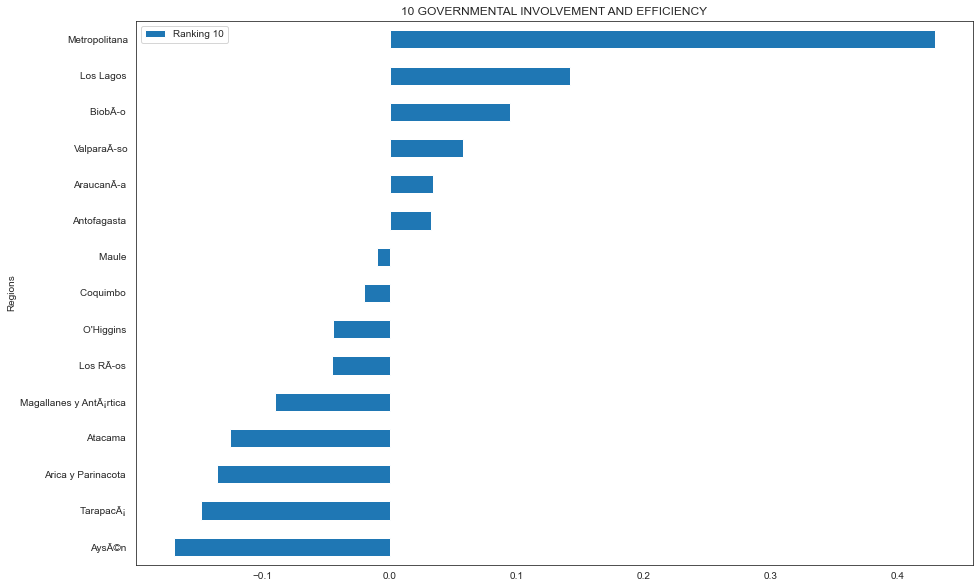

In [175]:
dim10.sort_values(by = 'Ranking 10',
                 ascending = True).plot.barh(y = 'Ranking 10',
                                             title = '10 GOVERNMENTAL INVOLVEMENT AND EFFICIENCY')
pass

#### 5.3 - Create an aggregated dataframe with all scores

In [210]:
scoring_data = pd.concat([dim1.iloc[:,-1:], dim2.iloc[:,-1:], dim3.iloc[:,-1:], dim4.iloc[:,-1:], dim5.iloc[:,-1:],
                          dim6.iloc[:,-1:], dim7.iloc[:,-1:], dim8.iloc[:,-1:], dim9.iloc[:,-1:], dim10.iloc[:,-1:]], 
                         axis = 1)

# Add a Overall column which is the sum across the row
scoring_data['Overall'] = scoring_data.sum(axis=1)

scoring_data

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10,Overall
Regions,,,,,,,,,,,
Arica y Parinacota,-0.386865,-0.011767,-0.206847,-0.146438,0.026411,-0.184242,-0.168982,-0.099796,-0.082051,-0.136136,-1.396713
TarapacÃ¡,-0.161739,-0.099703,-0.021496,-0.070096,-0.116496,-0.222647,-0.030747,0.023379,-0.022595,-0.148637,-0.870778
Antofagasta,0.061062,-0.243534,-0.042198,-0.018416,-0.053621,0.093754,-0.133656,0.088657,0.022788,0.032808,-0.192355
Atacama,-0.344736,-0.359092,-0.175224,-0.191659,-0.345047,-0.186519,-0.280487,-0.124936,-0.015453,-0.126136,-2.149288
Coquimbo,-0.182362,0.218210,-0.110381,0.116883,-0.172357,-0.252794,-0.113139,-0.168360,0.060048,-0.020128,-0.624382
ValparaÃ­so,1.010002,0.601401,0.238526,0.428856,0.383284,0.310636,0.121539,0.000938,0.075307,0.058180,3.228670
Metropolitana,2.162837,0.412958,1.107052,0.877413,1.072002,1.468560,1.306709,0.928958,0.331403,0.429481,10.097374
O'Higgins,-0.375904,-0.080616,-0.123246,-0.267996,-0.239521,-0.148752,-0.167534,-0.029760,-0.078559,-0.044798,-1.556685
Maule,-0.471167,-0.137135,-0.232702,-0.221008,-0.195883,-0.355407,-0.164965,-0.153725,-0.078070,-0.010065,-2.020127


In [211]:
# Highlight dataframe values with colors

# attach CSS classes to each cell
scoring_data.style.highlight_null().render().split('\n')[:10]

# Create a function for negative values (red)
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color


# Create a function for max values (yellow)
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


# Apply styles
scoring_data.style.applymap(color_negative_red).apply(highlight_max)

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10,Overall
Regions,,,,,,,,,,,
Arica y Parinacota,-0.386865,-0.011767,-0.206847,-0.146438,0.026411,-0.184242,-0.168982,-0.099796,-0.082051,-0.136136,-1.396713
TarapacÃ¡,-0.161739,-0.099703,-0.021496,-0.070096,-0.116496,-0.222647,-0.030747,0.023379,-0.022595,-0.148637,-0.870778
Antofagasta,0.061062,-0.243534,-0.042198,-0.018416,-0.053621,0.093754,-0.133656,0.088657,0.022788,0.032808,-0.192355
Atacama,-0.344736,-0.359092,-0.175224,-0.191659,-0.345047,-0.186519,-0.280487,-0.124936,-0.015453,-0.126136,-2.149288
Coquimbo,-0.182362,0.218210,-0.110381,0.116883,-0.172357,-0.252794,-0.113139,-0.168360,0.060048,-0.020128,-0.624382
ValparaÃ­so,1.010002,0.601401,0.238526,0.428856,0.383284,0.310636,0.121539,0.000938,0.075307,0.058180,3.228670
Metropolitana,2.162837,0.412958,1.107052,0.877413,1.072002,1.468560,1.306709,0.928958,0.331403,0.429481,10.097374
O'Higgins,-0.375904,-0.080616,-0.123246,-0.267996,-0.239521,-0.148752,-0.167534,-0.029760,-0.078559,-0.044798,-1.556685
Maule,-0.471167,-0.137135,-0.232702,-0.221008,-0.195883,-0.355407,-0.164965,-0.153725,-0.078070,-0.010065,-2.020127


# 6 Conclusion Outline

## Extra research done:
- The Travel & Tourism Competitiveness Report 2019 by World Economic Forum
- OECD Tourism Trends and Policies 2020
- "In post-COVID Latin America, investment in infrastructure can bring back tourism – and rebuild the economy" by World Economic Forum
- World Tourism Barometer Vol 18, Issue 5 (Aug/Sep 2020) by UNTWO (World Tourism Organization)


## Suggestion Overview 

**Focus on 2 dimensions**:  
- 02 NATURAL RESOURCES AND SUSTAINABILITY: strengthen advantage & long-term success
- 05 TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE: air transportation & international openness.

**Collect data for additional 2 dimensions**:
- Health and Hygiene
- ICT Readiness

**Post COVID strategies**:
- Collect data for the incoming Tourism App, Connect Tourism programme (Conecta Turismo), Digitalise Your SME initiative (Digitaliza tu Pyme)
- Contactless payment

# 7 Table manipulation for Taleau visualization

In [243]:
# Make a copy of the dataframe

scoring_data_c = scoring_data.copy()

In [244]:
# Standardize each column in the scale of 0 - 100, negative numbers are not intuitive for visual presentation

# This standardization is applied for each individual column because I am interested in the 

for i in range(0,11):
    scoring_data_c.iloc[:,i:i+1] = 100* (scoring_data_c.iloc[:,i:i+1] - scoring_data_c.iloc[:,i:i+1].min()) / (scoring_data_c.iloc[:,i:i+1].max() - scoring_data_c.iloc[:,i:i+1].min()) 

In [245]:
# In order to visualize regions as a map in Tableau
# I changed the region names to more official name and eliminate some syntax error caused by formatting issue

# Dropped the original index, which is the "Regions" column
scoring_data_c.reset_index(drop=True, inplace=True)

# Assign new "Regions" column
scoring_data_c['Regions'] = ['Arica y Parinacota',
                             'Tarapacá',
                             'Antofagasta',
                             'Atacama',
                             'Coquimbo',
                             'Valparaíso',
                             'Santiago',         # Región Metropolitana = Santiago Metropolitan Region
                             "Libertador General Bernardo O'Higgins",
                             'Maule',
                             'Bío-Bío',
                             'La Araucanía',
                             'Los Ríos',
                             'Los Lagos',
                             'Aysen del Gen. Carlos Ibáñez del Campo',
                             'Magallanes'
                            ]


# Print
scoring_data_c

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10,Overall,Regions
0,4.757803,36.161045,2.777496,16.727616,29.062671,9.384242,7.025266,9.681660,3.704004,5.644414,6.145147,Arica y Parinacota
1,13.167193,27.005775,16.492626,22.936694,19.367289,7.278663,15.734641,20.495674,17.551640,3.558959,10.439667,Tarapacá
2,21.489789,12.031106,14.960823,27.139950,23.632954,24.625476,9.250927,26.226744,28.121598,33.827487,15.979317,Antofagasta
3,6.331503,0.000000,5.117486,13.049664,3.861426,9.259357,0.000000,7.474529,19.215098,7.312544,0.000000,Atacama
4,12.396846,60.104715,9.915576,38.144147,15.577416,5.625795,10.543590,3.662179,36.799621,24.996641,12.451608,Coquimbo
5,56.936725,100.000000,35.733072,63.517737,53.274477,36.516146,25.329299,18.525508,40.353694,38.059925,43.913663,Valparaíso
6,100.000000,80.380548,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,Santiago
7,5.167239,28.992997,8.963640,6.840994,11.020767,11.329996,7.116483,15.830420,4.517309,20.881194,4.838895,Libertador General Bernardo O'Higgins
8,1.608772,23.108634,0.864384,10.662666,13.981323,0.000000,7.278316,4.947026,4.631139,26.675328,1.054662,Maule
9,27.401210,9.143218,26.389409,20.425791,28.818565,15.219239,32.458423,11.210803,16.125410,44.239148,18.555520,Bío-Bío


In [247]:
# Save the final result to a .csv file

scoring_data_c.to_csv("/Users/mucongl/Documents/Study/MSCA31015_Consulting/PCA - Chile Tourism_Consulting Module 6-8/Chile_ranking_result.csv")